## Regression

- Hands on ML Book

### Linear Regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

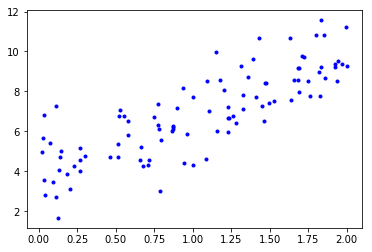

In [71]:
plt.plot(X,y,"b.")

In [61]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [63]:
theta_best

array([[3.84100409],
       [2.92594322]])

In [73]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [74]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [75]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.84100409],
       [9.69289053]])

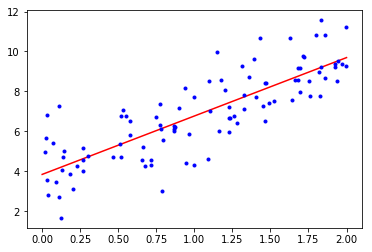

In [76]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [4]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
lin_reg.intercept_

array([3.67288006])

In [6]:
lin_reg.coef_

array([[3.24922172]])

In [82]:
lin_reg.predict(X_new)

array([[3.84100409],
       [9.69289053]])

### Polynomial Regresssion

In [83]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

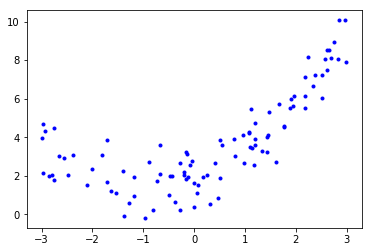

In [84]:
plt.plot(X, y, "b.")

##### # Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2 nd -degree polynomial) of each feature in the training set as new features


In [88]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.14507295])

In [87]:
X_poly[0]

array([-0.14507295,  0.02104616])

In [89]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94066947]), array([[0.96522519, 0.49782366]]))

In [91]:
X_poly_new = poly_features.fit_transform(X_new)
lin_reg.predict(X_poly_new)

array([[1.94066947],
       [5.8624145 ]])

### Learning Curves

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

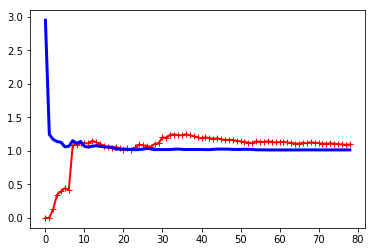

In [9]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

In [16]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [17]:
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [18]:
ridge_reg.predict([[1.5]])

array([[8.49832591]])

In [21]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.6234753])

### Lasso Regression 

In [22]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.39282712])

### ElasticNet

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.39282712])

### Logistic Regression

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/manishv/Desktop/venv/virtual_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

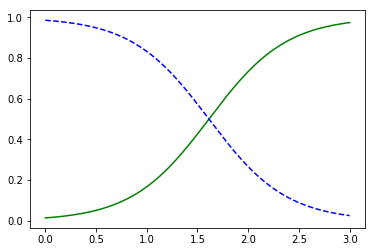

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [21]:
X_new[535:545]

array([[1.60660661],
       [1.60960961],
       [1.61261261],
       [1.61561562],
       [1.61861862],
       [1.62162162],
       [1.62462462],
       [1.62762763],
       [1.63063063],
       [1.63363363]])

In [22]:
y_proba[535:545, 1]

array([0.49595803, 0.49792333, 0.49988871, 0.50185408, 0.5038194 ,
       0.5057846 , 0.50774963, 0.50971441, 0.51167889, 0.51364301])

#### Multinomial Regression

In [24]:
X = iris["data"][:, (2, 3)]
y = iris["target"]
# petal length, petal width
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
softmax_reg.predict([[5, 2]])

array([2])

In [34]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])